In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import math
from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('pizza.csv')
df['Player'] = df['Player'].str.split('\\',expand=True)[0]
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tackles,Tkls Won,...,Dribbled Past,Successful Pressures,Def 3rd Press,Mid 3rd Press,Att 3rd Press,Blocks,Interceptions,Tkl+Int,Clearances,Errors
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,30-259,1990,19.7,1.62,0.96,...,1.37,3.45,6.55,2.84,1.02,1.57,1.73,3.35,2.03,0.05
1,2,Tammy Abraham,eng ENG,FW,Chelsea,23-225,1997,11.6,0.69,0.34,...,0.43,3.28,1.12,6.12,6.72,0.78,0.17,0.86,1.47,0.00
2,3,Che Adams,sco SCO,FW,Southampton,24-306,1996,28.1,1.03,0.57,...,0.57,4.70,1.71,5.41,7.12,0.89,0.36,1.39,0.57,0.04
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,23-233,1997,29.8,1.28,0.77,...,0.54,1.78,3.66,1.64,0.23,1.17,1.68,2.95,7.38,0.03
4,5,Adrián,es ESP,GK,Liverpool,34-132,1987,3.0,0.00,0.00,...,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.33


In [5]:
df = df[(df['Pos'] != 'GK') & (df['90s'] > 15)]
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tackles,Tkls Won,...,Dribbled Past,Successful Pressures,Def 3rd Press,Mid 3rd Press,Att 3rd Press,Blocks,Interceptions,Tkl+Int,Clearances,Errors
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,30-259,1990,19.7,1.62,0.96,...,1.37,3.45,6.55,2.84,1.02,1.57,1.73,3.35,2.03,0.05
2,3,Che Adams,sco SCO,FW,Southampton,24-306,1996,28.1,1.03,0.57,...,0.57,4.70,1.71,5.41,7.12,0.89,0.36,1.39,0.57,0.04
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,23-233,1997,29.8,1.28,0.77,...,0.54,1.78,3.66,1.64,0.23,1.17,1.68,2.95,7.38,0.03
6,7,Ola Aina,ng NGA,DF,Fulham,24-219,1996,28.9,1.63,0.87,...,0.80,2.11,4.74,3.11,0.76,1.56,1.76,3.39,4.19,0.00
8,9,Semi Ajayi,ng NGA,DF,West Brom,27-187,1993,27.9,2.04,1.47,...,0.54,4.48,7.46,3.33,0.57,1.90,1.25,3.30,4.70,0.07


In [6]:
df = df.drop(['Rk','Nation','Pos','Squad','Age','Born'], axis = 1).reset_index()

In [9]:
params = list(df.columns)
params = params[2:]

In [10]:
player = df.loc[df['Player'] == 'João Cancelo'].reset_index()
player = list(player.loc[0])
player = player[3:]

In [11]:
values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(df[params[x]], player[x])))

In [12]:
round(stats.percentileofscore(df[params[0]], player[0]))

57

In [13]:
for n,i in enumerate(values):
    if i == 100:
        values[n] = 99

In [14]:
baker = PyPizza(
    params = params,                 
    straight_line_color = "#000000",  
    straight_line_lw = 1,            
    last_circle_lw = 1,               
    other_circle_lw = 1,             
    other_circle_ls = "-."       
)

Text(0.515, 0.942, 'Per 90 Percentile Rank vs Premier League Defenders | 2020-21')

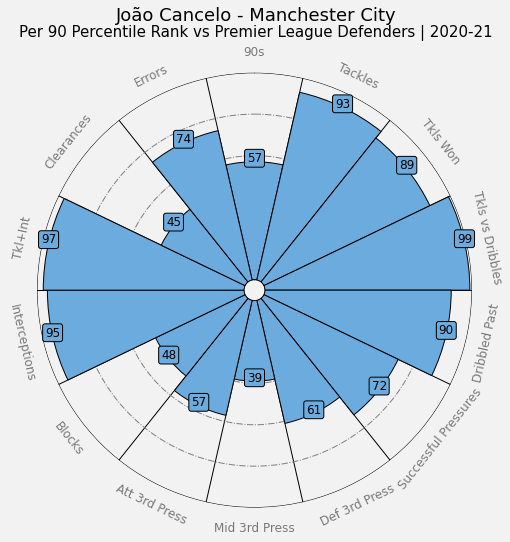

In [17]:
fig, ax = baker.make_pizza(
    values,              
    figsize = (8, 8),     
    param_location = 110,  
    kwargs_slices = dict(
        facecolor = "#6CABDD", edgecolor = "#000000",
        zorder = 2, linewidth = 1
    ),
    kwargs_params = dict(
        color = "#000000", fontsize = 12,
        va = "center", alpha = .5
    ),
    kwargs_values = dict(
        color = "#000000", fontsize = 12,
        zorder = 3,
        bbox = dict(
            edgecolor = "#000000", facecolor = "#6CABDD",
            boxstyle = "round,pad=0.2", lw = 1
        )
    )                    
)

fig.text(
    0.515, 0.97, "João Cancelo - Manchester City", size=18,
    ha = "center", color = "#000000"
)

fig.text(
    0.515, 0.942,
    "Per 90 Percentile Rank vs Premier League Defenders | 2020-21",
    size = 15,
    ha = "center", color = "#000000"
)



In [18]:
values

[57, 93, 89, 99, 90, 72, 61, 39, 57, 48, 95, 97, 45, 74]